In [27]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

from testing import *
from src.models.qsar_OLS_pca import *

In [28]:
# Load the data
df = pd.read_csv("src/data/IC50_df.csv")
cdk = ["Cyclin-dependent kinase 2"]

model, X_train, X_test, y_train, y_test, scaler, pca = create_model(df, cdk)

/Users/mathiasmarkvardsen/adaProject/ada-2024-project-forzada/src/models/helper_functions_qsar.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["log_IC50"] = np.log(df["IC50 (nM)"].values)
[17:58:04] DEPRECATION WARNING: please use MorganGenerator
[17:58:04] DEPRECATION WARNING: please use MorganGenerator
[17:58:04] DEPRECATION WARNING: please use MorganGenerator
[17:58:04] DEPRECATION WARNING: please use MorganGenerator
[17:58:04] DEPRECATION WARNING: please use MorganGenerator
[17:58:04] DEPRECATION WARNING: please use MorganGenerator
[17:58:04] DEPRECATION WARNING: please use MorganGenerator
[17:58:04] DEPRECATION WARNING: please use MorganGenerator
[17:58:04] DEPRECATION WARNING: please use MorganGenerator
[17:58:04] DEPRECATION WARNIN

OBS maybe do folds when training...

Example of one model train on one CDK compared against a random model. It is clear that the OLS model performs


OBS we need to add the constant term as the intercept to the red line in the plots!

R2 of the original model:  0.9648371838409143
R2 of the shuffled model:  0.24184141764608158
RMSE of the original model:  0.6596482090996413
RMSE of the shuffled model:  3.0630253453565213


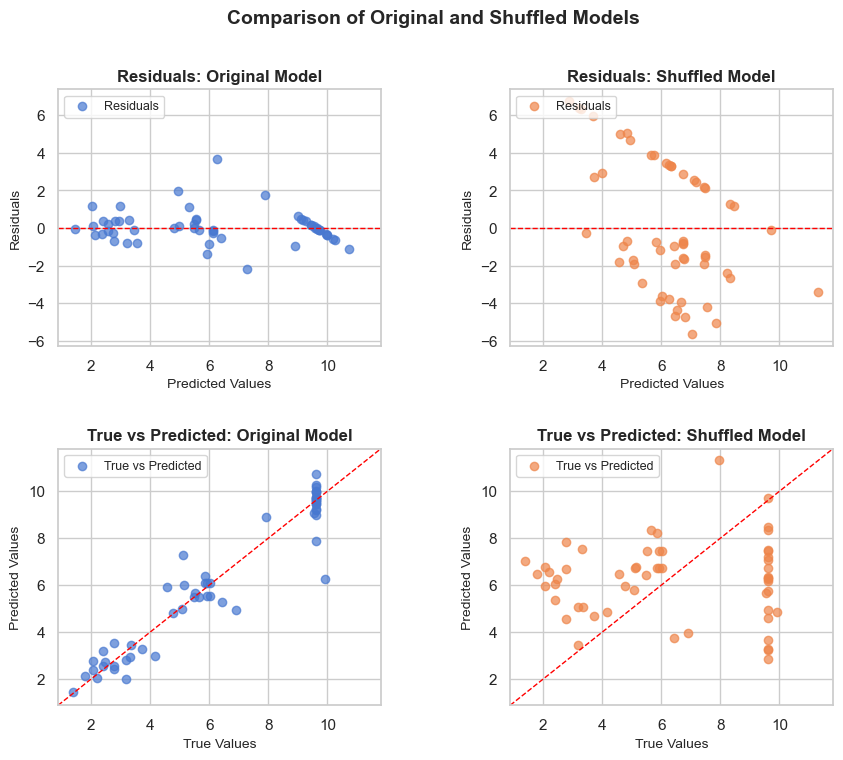

In [29]:
# Compare the CDK OLS model to a random model (predicting on the chosen CDK's test data)
compare_cdkmodel_and_shuffled(model, y_train=y_train, X_train=X_train, y_test=y_test, X_test=X_test)

___________
Make one model for each of the CDKs

In [30]:
# Count how many samples each CDK has
count = df["Target Name"].value_counts()

# Choose the CDKs which all contains at least 100 samples
top_k_cdks = count[count >= 100].index
# Print the top k CDKs as well as their count
for cdk in top_k_cdks:
    print(f"{cdk}: {count[cdk]}")
print(f"\nThere are {len(top_k_cdks)} CDKs which all contains at least 100 samples")

Cyclin-dependent kinase 2/G1/S-specific cyclin-E1: 1206
Cyclin-dependent kinase 4/G1/S-specific cyclin-D1: 901
Cyclin-A2/Cyclin-dependent kinase 2: 893
Cyclin-dependent kinase 2: 761
Cyclin-dependent kinase 4: 714
Cyclin-dependent kinase 9: 526
Cyclin-dependent kinase/G2/mitotic-specific cyclin- 1: 520
Cyclin-dependent kinase 1: 481
Cyclin-dependent kinase 1/G2/mitotic-specific cyclin-B: 464
Cyclin-T1/Cyclin-dependent kinase 9: 405
Cyclin-dependent kinase 6: 271
Cyclin-dependent kinase 5 activator 1 [99-307]: 268
Cyclin-dependent kinase 4/G1/S-specific cyclin-D1 [L188C]: 223
Cyclin-A2 [171-432]/Cyclin-dependent kinase 2: 138

There are 14 CDKs which all contains at least 100 samples


We need to comment on how balanced the different CDKs are.

The model will predict according to the input!

In [31]:
# print status 

# Create a model for each of the top k CDKs
models = []

# Save the R2 and the RMSE for each model
r2 = []
rmse = []
counter = 0
for cdk in top_k_cdks:
    model, _, _, _, _, _, _ = create_model(df, [cdk])
    models.append(model)
    r2.append((cdk, model.rsquared))
    rmse.append((cdk, model.mse_resid**0.5))
    counter += 1
    print(f"{counter} CDKs done")


/Users/mathiasmarkvardsen/adaProject/ada-2024-project-forzada/src/models/helper_functions_qsar.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["log_IC50"] = np.log(df["IC50 (nM)"].values)
[17:58:04] DEPRECATION WARNING: please use MorganGenerator
[17:58:04] DEPRECATION WARNING: please use MorganGenerator
[17:58:04] DEPRECATION WARNING: please use MorganGenerator
[17:58:04] DEPRECATION WARNING: please use MorganGenerator
[17:58:04] DEPRECATION WARNING: please use MorganGenerator
[17:58:04] DEPRECATION WARNING: please use MorganGenerator
[17:58:04] DEPRECATION WARNING: please use MorganGenerator
[17:58:04] DEPRECATION WARNING: please use MorganGenerator
[17:58:04] DEPRECATION WARNING: please use MorganGenerator
[17:58:04] DEPRECATION WARNIN

1 CDKs done


/Users/mathiasmarkvardsen/adaProject/ada-2024-project-forzada/src/models/helper_functions_qsar.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["log_IC50"] = np.log(df["IC50 (nM)"].values)
[17:58:07] DEPRECATION WARNING: please use MorganGenerator
[17:58:07] DEPRECATION WARNING: please use MorganGenerator
[17:58:07] DEPRECATION WARNING: please use MorganGenerator
[17:58:07] DEPRECATION WARNING: please use MorganGenerator
[17:58:07] DEPRECATION WARNING: please use MorganGenerator
[17:58:07] DEPRECATION WARNING: please use MorganGenerator
[17:58:07] DEPRECATION WARNING: please use MorganGenerator
[17:58:07] DEPRECATION WARNING: please use MorganGenerator
[17:58:07] DEPRECATION WARNING: please use MorganGenerator
[17:58:07] DEPRECATION WARNIN

2 CDKs done


/Users/mathiasmarkvardsen/adaProject/ada-2024-project-forzada/src/models/helper_functions_qsar.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["log_IC50"] = np.log(df["IC50 (nM)"].values)
[17:58:08] DEPRECATION WARNING: please use MorganGenerator
[17:58:08] DEPRECATION WARNING: please use MorganGenerator
[17:58:08] DEPRECATION WARNING: please use MorganGenerator
[17:58:08] DEPRECATION WARNING: please use MorganGenerator
[17:58:08] DEPRECATION WARNING: please use MorganGenerator
[17:58:08] DEPRECATION WARNING: please use MorganGenerator
[17:58:08] DEPRECATION WARNING: please use MorganGenerator
[17:58:08] DEPRECATION WARNING: please use MorganGenerator
[17:58:08] DEPRECATION WARNING: please use MorganGenerator
[17:58:08] DEPRECATION WARNIN

3 CDKs done


/Users/mathiasmarkvardsen/adaProject/ada-2024-project-forzada/src/models/helper_functions_qsar.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["log_IC50"] = np.log(df["IC50 (nM)"].values)
[17:58:09] DEPRECATION WARNING: please use MorganGenerator
[17:58:09] DEPRECATION WARNING: please use MorganGenerator
[17:58:09] DEPRECATION WARNING: please use MorganGenerator
[17:58:09] DEPRECATION WARNING: please use MorganGenerator
[17:58:09] DEPRECATION WARNING: please use MorganGenerator
[17:58:09] DEPRECATION WARNING: please use MorganGenerator
[17:58:09] DEPRECATION WARNING: please use MorganGenerator
[17:58:09] DEPRECATION WARNING: please use MorganGenerator
[17:58:09] DEPRECATION WARNING: please use MorganGenerator
[17:58:09] DEPRECATION WARNIN

4 CDKs done


/Users/mathiasmarkvardsen/adaProject/ada-2024-project-forzada/src/models/helper_functions_qsar.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["log_IC50"] = np.log(df["IC50 (nM)"].values)
[17:58:09] DEPRECATION WARNING: please use MorganGenerator
[17:58:09] DEPRECATION WARNING: please use MorganGenerator
[17:58:09] DEPRECATION WARNING: please use MorganGenerator
[17:58:09] DEPRECATION WARNING: please use MorganGenerator
[17:58:09] DEPRECATION WARNING: please use MorganGenerator
[17:58:09] DEPRECATION WARNING: please use MorganGenerator
[17:58:09] DEPRECATION WARNING: please use MorganGenerator
[17:58:09] DEPRECATION WARNING: please use MorganGenerator
[17:58:09] DEPRECATION WARNING: please use MorganGenerator
[17:58:09] DEPRECATION WARNIN

5 CDKs done


/Users/mathiasmarkvardsen/adaProject/ada-2024-project-forzada/src/models/helper_functions_qsar.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["log_IC50"] = np.log(df["IC50 (nM)"].values)
[17:58:10] DEPRECATION WARNING: please use MorganGenerator
[17:58:10] DEPRECATION WARNING: please use MorganGenerator
[17:58:10] DEPRECATION WARNING: please use MorganGenerator
[17:58:10] DEPRECATION WARNING: please use MorganGenerator
[17:58:10] DEPRECATION WARNING: please use MorganGenerator
[17:58:10] DEPRECATION WARNING: please use MorganGenerator
[17:58:10] DEPRECATION WARNING: please use MorganGenerator
[17:58:10] DEPRECATION WARNING: please use MorganGenerator
[17:58:10] DEPRECATION WARNING: please use MorganGenerator
[17:58:10] DEPRECATION WARNIN

6 CDKs done


/Users/mathiasmarkvardsen/adaProject/ada-2024-project-forzada/src/models/helper_functions_qsar.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["log_IC50"] = np.log(df["IC50 (nM)"].values)
[17:58:10] DEPRECATION WARNING: please use MorganGenerator
[17:58:10] DEPRECATION WARNING: please use MorganGenerator
[17:58:10] DEPRECATION WARNING: please use MorganGenerator
[17:58:10] DEPRECATION WARNING: please use MorganGenerator
[17:58:10] DEPRECATION WARNING: please use MorganGenerator
[17:58:10] DEPRECATION WARNING: please use MorganGenerator
[17:58:10] DEPRECATION WARNING: please use MorganGenerator
[17:58:10] DEPRECATION WARNING: please use MorganGenerator
[17:58:10] DEPRECATION WARNING: please use MorganGenerator
[17:58:10] DEPRECATION WARNIN

7 CDKs done


/Users/mathiasmarkvardsen/adaProject/ada-2024-project-forzada/src/models/helper_functions_qsar.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["log_IC50"] = np.log(df["IC50 (nM)"].values)
[17:58:11] DEPRECATION WARNING: please use MorganGenerator
[17:58:11] DEPRECATION WARNING: please use MorganGenerator
[17:58:11] DEPRECATION WARNING: please use MorganGenerator
[17:58:11] DEPRECATION WARNING: please use MorganGenerator
[17:58:11] DEPRECATION WARNING: please use MorganGenerator
[17:58:11] DEPRECATION WARNING: please use MorganGenerator
[17:58:11] DEPRECATION WARNING: please use MorganGenerator
[17:58:11] DEPRECATION WARNING: please use MorganGenerator
[17:58:11] DEPRECATION WARNING: please use MorganGenerator
[17:58:11] DEPRECATION WARNIN

8 CDKs done


/Users/mathiasmarkvardsen/adaProject/ada-2024-project-forzada/src/models/helper_functions_qsar.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["log_IC50"] = np.log(df["IC50 (nM)"].values)
[17:58:11] DEPRECATION WARNING: please use MorganGenerator
[17:58:11] DEPRECATION WARNING: please use MorganGenerator
[17:58:11] DEPRECATION WARNING: please use MorganGenerator
[17:58:11] DEPRECATION WARNING: please use MorganGenerator
[17:58:11] DEPRECATION WARNING: please use MorganGenerator
[17:58:11] DEPRECATION WARNING: please use MorganGenerator
[17:58:11] DEPRECATION WARNING: please use MorganGenerator
[17:58:11] DEPRECATION WARNING: please use MorganGenerator
[17:58:11] DEPRECATION WARNING: please use MorganGenerator
[17:58:11] DEPRECATION WARNIN

9 CDKs done


/Users/mathiasmarkvardsen/adaProject/ada-2024-project-forzada/src/models/helper_functions_qsar.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["log_IC50"] = np.log(df["IC50 (nM)"].values)
[17:58:12] DEPRECATION WARNING: please use MorganGenerator
[17:58:12] DEPRECATION WARNING: please use MorganGenerator
[17:58:12] DEPRECATION WARNING: please use MorganGenerator
[17:58:12] DEPRECATION WARNING: please use MorganGenerator
[17:58:12] DEPRECATION WARNING: please use MorganGenerator
[17:58:12] DEPRECATION WARNING: please use MorganGenerator
[17:58:12] DEPRECATION WARNING: please use MorganGenerator
[17:58:12] DEPRECATION WARNING: please use MorganGenerator
[17:58:12] DEPRECATION WARNING: please use MorganGenerator
[17:58:12] DEPRECATION WARNIN

10 CDKs done
11 CDKs done


/Users/mathiasmarkvardsen/adaProject/ada-2024-project-forzada/src/models/helper_functions_qsar.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["log_IC50"] = np.log(df["IC50 (nM)"].values)
[17:58:12] DEPRECATION WARNING: please use MorganGenerator
[17:58:12] DEPRECATION WARNING: please use MorganGenerator
[17:58:12] DEPRECATION WARNING: please use MorganGenerator
[17:58:12] DEPRECATION WARNING: please use MorganGenerator
[17:58:12] DEPRECATION WARNING: please use MorganGenerator
[17:58:12] DEPRECATION WARNING: please use MorganGenerator
[17:58:12] DEPRECATION WARNING: please use MorganGenerator
[17:58:12] DEPRECATION WARNING: please use MorganGenerator
[17:58:12] DEPRECATION WARNING: please use MorganGenerator
[17:58:12] DEPRECATION WARNIN

12 CDKs done
13 CDKs done
14 CDKs done


/Users/mathiasmarkvardsen/adaProject/ada-2024-project-forzada/src/models/helper_functions_qsar.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["log_IC50"] = np.log(df["IC50 (nM)"].values)
[17:58:13] DEPRECATION WARNING: please use MorganGenerator
[17:58:13] DEPRECATION WARNING: please use MorganGenerator
[17:58:13] DEPRECATION WARNING: please use MorganGenerator
[17:58:13] DEPRECATION WARNING: please use MorganGenerator
[17:58:13] DEPRECATION WARNING: please use MorganGenerator
[17:58:13] DEPRECATION WARNING: please use MorganGenerator
[17:58:13] DEPRECATION WARNING: please use MorganGenerator
[17:58:13] DEPRECATION WARNING: please use MorganGenerator
[17:58:13] DEPRECATION WARNING: please use MorganGenerator
[17:58:13] DEPRECATION WARNIN

In [32]:
# Create a DataFrame for the R2 and RMSE values
df_r2 = pd.DataFrame(r2, columns=["CDK", "R2"])
df_rmse = pd.DataFrame(rmse, columns=["CDK", "RMSE"])

# Merge the two DataFrames on the CDK column
df_combined = pd.merge(df_r2, df_rmse, on="CDK")

# Sort descending by R2
df_combined = df_combined.sort_values(by="R2", ascending=False)

/var/folders/sm/bpqf8wpj6478c8rtz31k076r0000gn/T/ipykernel_94026/388056302.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="CDK", x="R2", data=df_combined, palette="Blues_d", ax=ax[0])
/var/folders/sm/bpqf8wpj6478c8rtz31k076r0000gn/T/ipykernel_94026/388056302.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="CDK", x="RMSE", data=df_combined, palette="Reds_d", ax=ax[1])


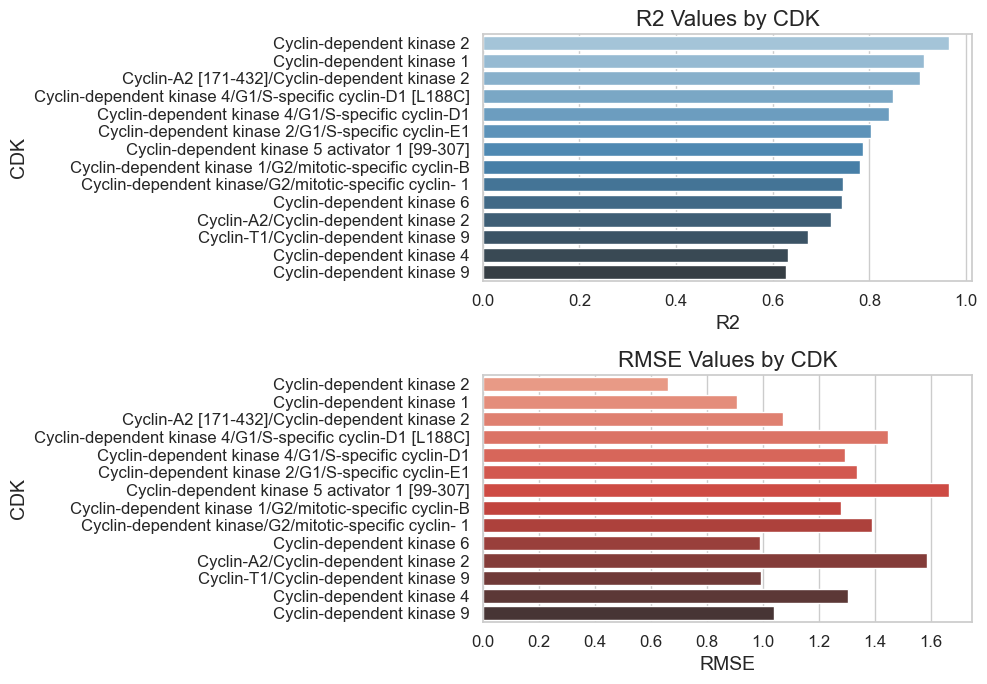

In [33]:
# Use Seaborn style for better aesthetics
sns.set_theme(style="whitegrid")

# Create the plot
fig, ax = plt.subplots(2, 1, figsize=(10, 7))

# Plot R2
sns.barplot(y="CDK", x="R2", data=df_combined, palette="Blues_d", ax=ax[0])
ax[0].set_title("R2 Values by CDK", fontsize=16)
ax[0].set_xlabel("R2", fontsize=14)
ax[0].set_ylabel("CDK", fontsize=14)
ax[0].tick_params(labelsize=12)

# Plot RMSE
sns.barplot(y="CDK", x="RMSE", data=df_combined, palette="Reds_d", ax=ax[1])
ax[1].set_title("RMSE Values by CDK", fontsize=16)
ax[1].set_xlabel("RMSE", fontsize=14)
ax[1].set_ylabel("CDK", fontsize=14)
ax[1].tick_params(labelsize=12)

# Adjust layout
plt.tight_layout()
plt.show()

OBS report spearman correlation


maybe note the p values

______
Prediction part 🤩

In [34]:
print(scaler_cdk)

StandardScaler()


In [35]:
# Listing random ligand SMILES
aspirin_smiles = "CC(=O)OC1=CC=CC=C1C(=O)O"
paracetamol_smiles = "CC(=O)Nc1ccc(cc1)O"
ethanol_smiles = "CCO"

smiles_list = [aspirin_smiles, paracetamol_smiles, ethanol_smiles]

# Predicting the affinity of the model from the (actually the last???) CDK with the ligands
for smiles in smiles_list:
    pred = predict_log_affinity(model, smiles, scaler, pca)
    print(f"Expecting prediction for {smiles} (log): {pred}")
    print(f"Expecting prediction for {smiles} (nM): {np.exp(pred)}")


Expecting prediction for CC(=O)OC1=CC=CC=C1C(=O)O (log): [9.72106942]
Expecting prediction for CC(=O)OC1=CC=CC=C1C(=O)O (nM): [16665.05712244]
Expecting prediction for CC(=O)Nc1ccc(cc1)O (log): [8.57112087]
Expecting prediction for CC(=O)Nc1ccc(cc1)O (nM): [5277.0413532]
Expecting prediction for CCO (log): [10.97818213]
Expecting prediction for CCO (nM): [58581.96302892]


[17:58:14] DEPRECATION WARNING: please use MorganGenerator
[17:58:14] DEPRECATION WARNING: please use MorganGenerator
[17:58:14] DEPRECATION WARNING: please use MorganGenerator


OBS make a prediction plot of different ligands kinda like a histogram

In [36]:

type(X_train)

numpy.ndarray

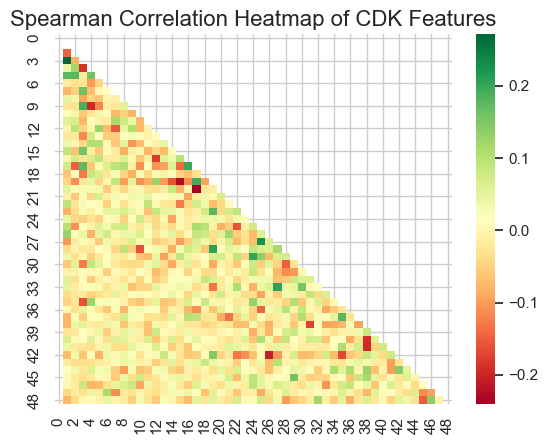

In [37]:
df_X_train = pd.DataFrame(X_train)
spearman_corr = df_X_train.corr(method="spearman")

# Create a mask to only show the lower triangle of the correlation matrix
mask = np.triu(np.ones_like(spearman_corr, dtype=bool))

# Use Seaborn style for better aesthetics
sns.set_theme(style="whitegrid")
sns.heatmap(spearman_corr, mask=mask, cmap="RdYlGn", annot=False, fmt=".2f")
plt.title("Spearman Correlation Heatmap of CDK Features", fontsize=16)
plt.show()

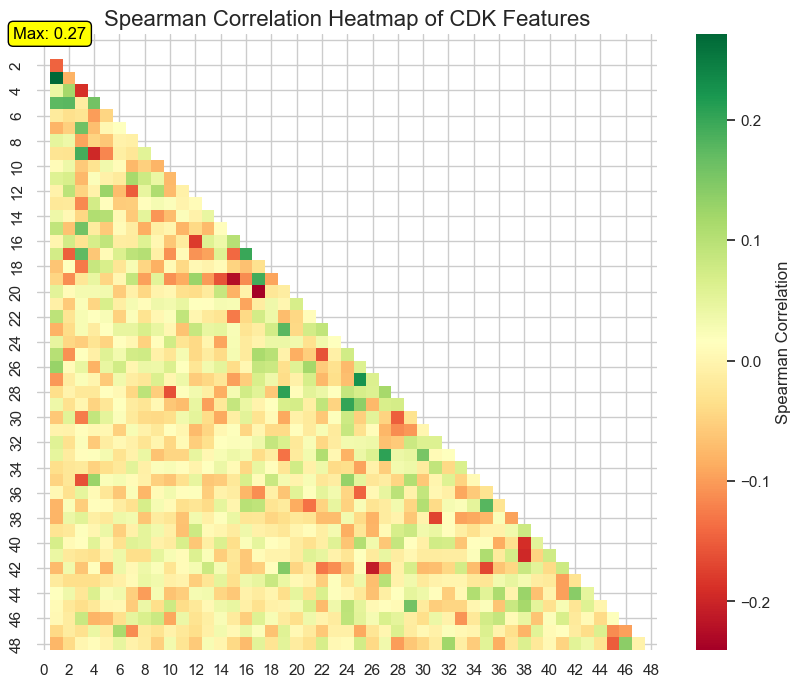

The strongest correlation is 0.27 between Feature 0 and Feature 1.


In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_X_train is your DataFrame of features
spearman_corr = df_X_train.corr(method="spearman")

# Calculate absolute correlations and find the maximum (off-diagonal)
abs_corr = spearman_corr.abs()
np.fill_diagonal(abs_corr.values, 0)  # Ignore self-correlation (diagonal)
max_corr = abs_corr.max().max()  # Maximum absolute correlation
max_corr_pair = np.unravel_index(abs_corr.values.argmax(), abs_corr.shape)

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(spearman_corr, dtype=bool))

# Set up a meaningful color theme
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 8))
sns.heatmap(
    spearman_corr,
    mask=mask,
    cmap="RdYlGn",  # Meaningful palette
    annot=False,
    fmt=".2f",
    cbar_kws={"label": "Spearman Correlation"},
)

# Annotate the plot with the maximum absolute correlation
plt.title("Spearman Correlation Heatmap of CDK Features", fontsize=16)
plt.text(
    max_corr_pair[1],
    max_corr_pair[0],
    f"Max: {max_corr:.2f}",
    ha="center",
    va="center",
    color="black",
    fontsize=12,
    bbox=dict(facecolor="yellow", edgecolor="black", boxstyle="round,pad=0.3"),
)

plt.show()

# Display the strongest correlation details
print(
    f"The strongest correlation is {max_corr:.2f} between Feature {max_corr_pair[0]} and Feature {max_corr_pair[1]}."
)